Answer 1

In [8]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: visions

In [9]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
df=pd.read_csv('red_wine.csv')
profile = ProfileReport(df, title="Profiling Report")
profile.to_widgets()
profile.to_notebook_iframe()
profile.to_file("assignment1.html")

/usr/local/lib/python3.9/dist-packages/ydata_profiling/profile_report.py:498: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Answer 2

In [10]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

df = pd.read_csv("red_wine.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

nb = GaussianNB()
svm = SVC(kernel='linear', probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression(max_iter=1000)

oner = DummyClassifier(strategy='most_frequent')
zeror = DummyClassifier(strategy='constant', constant='low')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrics = {'AUC': roc_auc_score, 'Accuracy': accuracy_score}

results = []

for model in [nb, svm, dt, rf, lr, oner, zeror]:
    row = {'Model': type(model).__name__}
    
    for metric_name, metric_func in metrics.items():
        if metric_name == 'AUC':
            scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', error_score='raise')
        else:
            scores = cross_val_score(model, X, y, cv=cv, scoring=metric_name.lower(), error_score='raise')
        
        mean_score = scores.mean()
        std_dev = scores.std() * 2
        
        row[metric_name] = mean_score
        row[metric_name + ' (std)'] = std_dev
    
    results.append(row)
    
df_results = pd.DataFrame(results)

df_results.set_index('Model', inplace=True)

print(df_results)


                             AUC  AUC (std)  Accuracy  Accuracy (std)
Model                                                                
GaussianNB              0.893291   0.075006  0.824773        0.098457
SVC                     0.875446   0.094016  0.793134        0.102164
DecisionTreeClassifier  0.809303   0.111155  0.807199        0.114799
RandomForestClassifier  0.916735   0.061720  0.849153        0.142381
LogisticRegression      0.875819   0.094182  0.784392        0.084074
DummyClassifier         0.500000   0.000000  0.528887        0.011106
DummyClassifier         0.500000   0.000000  0.471113        0.011106


Ans 3

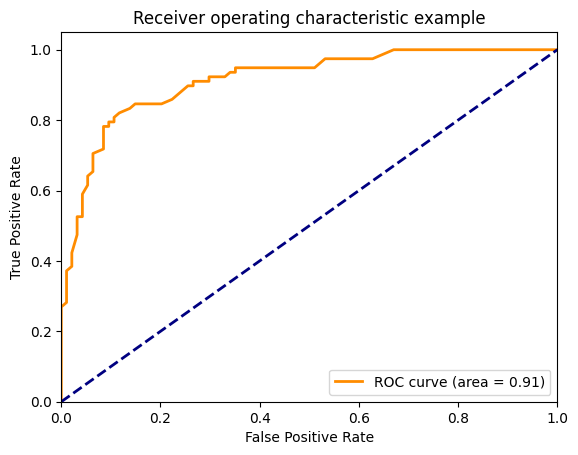

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv("red_wine.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_score = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Answer 4

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("white_wine.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_score)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.889


Answer 5

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
df = pd.read_csv("white_wine.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred = dt.predict(X)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

        high       1.00      1.00      1.00        61
         low       1.00      1.00      1.00        17

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [11]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


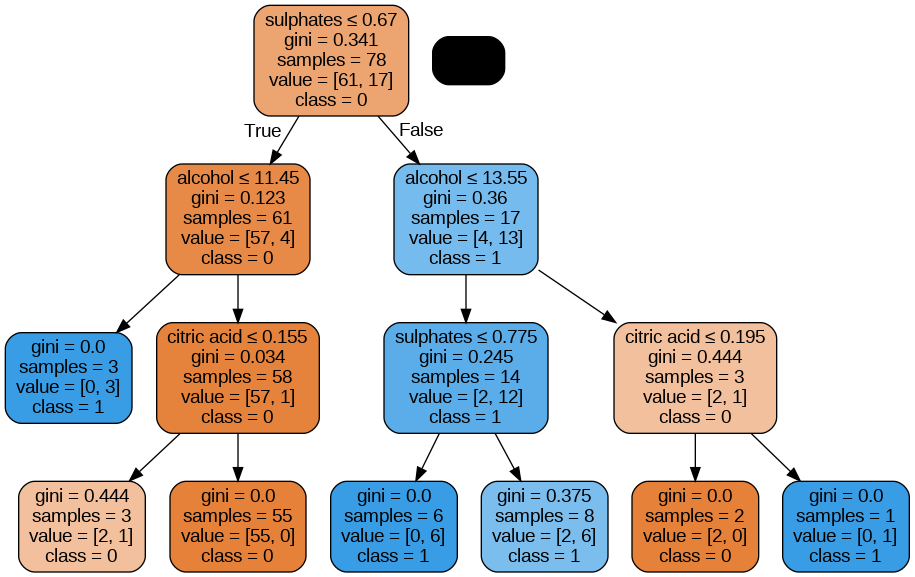

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
df = pd.read_csv("white_wine.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
